In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("UM_datathon_2024.csv")
df.head()

,time,difficulty,estimated_leverage_ratio,addresses_count_active,addresses_count_sender,addresses_count_receiver,exchange_whale_ratio,coinbase_premium_gap,coinbase_premium_index,coinbase_premium_gap_usdt_adjusted,...,long_liquidations,short_liquidations,long_liquidations_usd,short_liquidations_usd,open_price,high_price,low_price,close_price,volume,open_interest
0,2020-03-25 10:00:00,1.655292e+13,0.070577,30656,12888,21617,0.940847,12.50,0.189479,1.125713,...,425.717,8.770,2.831061e+06,58055.69835,6500.0,6591.5,6500.0,6591.5,0.004,1.198203e+08
1,2020-03-25 11:00:00,1.655292e+13,0.071966,21379,8467,14875,0.885981,18.64,0.285830,2.369076,...,385.434,21.699,2.499324e+06,142518.22527,6591.5,6628.5,6457.5,6511.5,438.873,1.211306e+08
2,2020-03-25 12:00:00,1.655292e+13,0.072686,29164,13292,19201,0.884669,17.17,0.260595,7.388429,...,6.060,35.155,3.950575e+04,230609.80208,6511.5,6588.5,6502.0,6583.5,529.318,1.236765e+08
3,2020-03-25 13:00:00,NaN,0.070549,0,0,0,0.000000,16.12,0.245213,4.339870,...,106.667,134.954,7.070354e+05,898106.41361,6583.5,6745.5,6562.0,6585.0,449.162,1.197917e+08
4,2020-03-25 14:00:00,1.655292e+13,0.071959,25234,10221,18363,0.867330,14.46,0.218125,-2.762051,...,124.720,52.400,8.154464e+05,347108.26236,6585.0,6640.0,6516.0,6590.0,258.831,1.228579e+08


In [76]:
from sklearn.ensemble import RandomForestRegressor
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].astype('int64')
# Put all features into X and the target into y
X = df.drop(columns=['close_price','high_price','low_price','open_price'])
y = df['close_price']

# Assuming 'X' is your features and 'y' is the target (close_price)
model = RandomForestRegressor()
model.fit(X, y)

feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
top_17_factors = importance_df.sort_values(by='Importance', ascending=False).head(19)


In [77]:
top_17_factors

,Feature,Importance
38,open_interest,0.530692
25,exchange_supply_ratio,0.225732
0,time,0.204226
1,difficulty,0.019090
2,estimated_leverage_ratio,0.009010
17,blockreward_usd,0.004010
21,fees_transaction_median_usd,0.002574
22,miner_supply_ratio,0.001535
37,volume,0.001465
19,fees_transaction_mean_usd,0.001014


In [78]:
# Create a new dataframe with the top 17 features
df_top_17 = df[top_17_factors["Feature"].values]
df_top_17.head()

df_top_17["close_price"] = y

C:\Users\USER\AppData\Local\Temp\ipykernel_21000\1244867665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_17["close_price"] = y


In [79]:
df_top_17.isna().sum()

open_interest                             0
exchange_supply_ratio                     0
time                                      0
difficulty                              135
estimated_leverage_ratio                  0
blockreward_usd                           0
fees_transaction_median_usd               0
miner_supply_ratio                        0
volume                                    0
fees_transaction_mean_usd               135
coinbase_premium_gap                     32
coinbase_premium_index                   32
fees_transaction_mean                   135
fees_transaction_median                   0
blockreward                               0
coinbase_premium_index_usdt_adjusted     32
tokens_transferred_median                 0
tokens_transferred_mean                 135
taker_buy_volume                          7
close_price                               0
dtype: int64

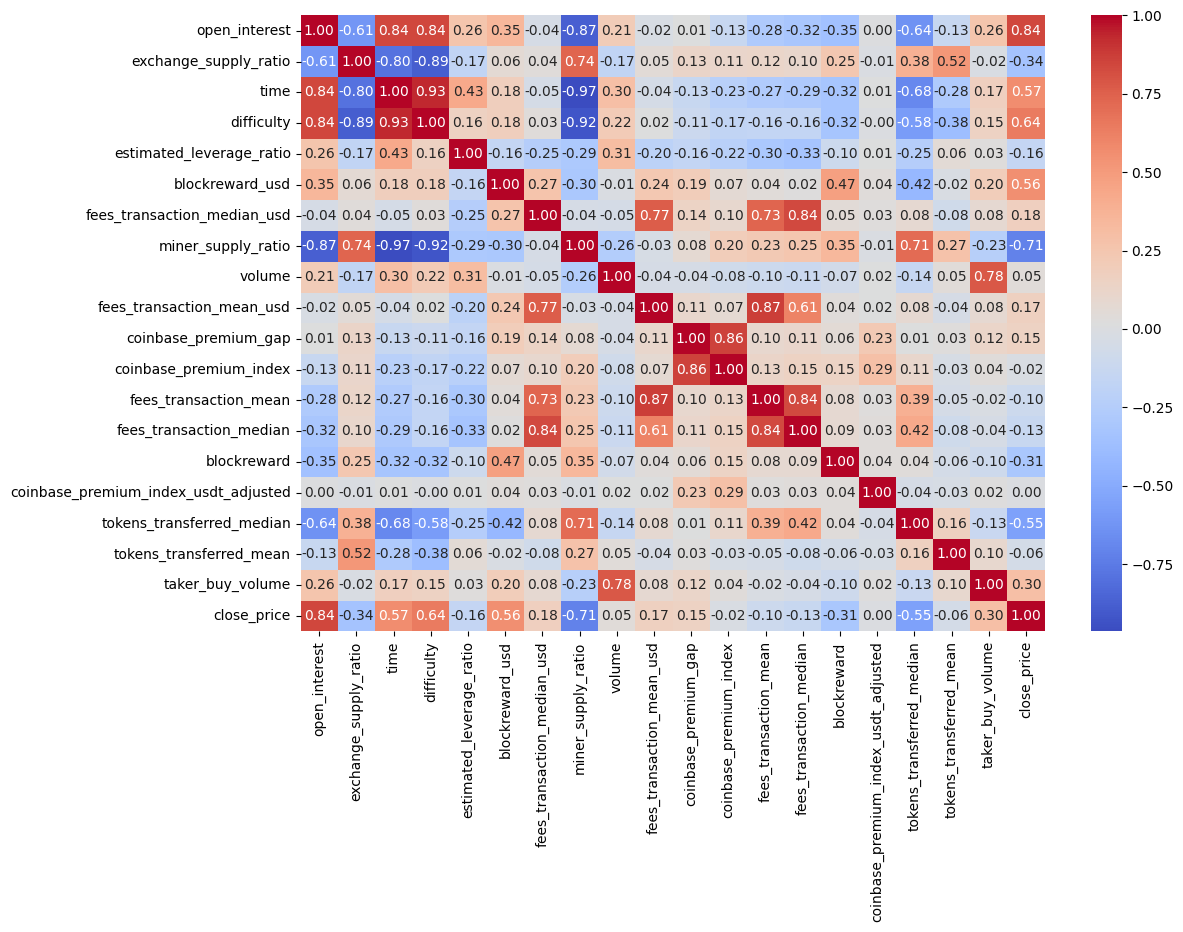

In [81]:
# Set figure size
plt.figure(figsize=(12, 8))  # Adjust the values as needed (width, height)

# Create heatmap
sns.heatmap(df_top_17.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
df.dtypes

difficulty                              float64
estimated_leverage_ratio                float64
addresses_count_active                    int64
addresses_count_sender                    int64
addresses_count_receiver                  int64
exchange_whale_ratio                    float64
coinbase_premium_gap                    float64
coinbase_premium_index                  float64
coinbase_premium_gap_usdt_adjusted      float64
coinbase_premium_index_usdt_adjusted    float64
taker_buy_volume                        float64
taker_sell_volume                       float64
taker_buy_ratio                         float64
taker_sell_ratio                        float64
taker_buy_sell_ratio                    float64
blockreward                             float64
blockreward_usd                         float64
fees_transaction_mean                   float64
fees_transaction_mean_usd               float64
fees_transaction_median                 float64
fees_transaction_median_usd             